## Aula 2: A importância da linguagem

#### Gustavo Eliziario Stevenson de Oliveira

##### 1 - Modificando número de iterações com slurm base

In [5]:
########### 15 Iterações ###########
convolucao_limitado_15 = 0.863159
convolucao_buffado_15 = 0.229735

print("convolucao limitado 15 iteracoes: ", convolucao_limitado_15)
print("convolucao buffado 15 iterações: ", convolucao_buffado_15)

########### 30 Iterações ###########
convolucao_limitado_30 = 1.73501
convolucao_buffado_30 = 0.454595

print("convolucao limitado 30 iteracoes: ", convolucao_limitado_30)
print("convolucao buffado 30 iterações: ", convolucao_buffado_30)
########### 50 Iterações ###########
convolucao_limitado_50 = 2.89463
convolucao_buffado_50 = 0.767807

print("convolucao limitado 50 iteracoes: ", convolucao_limitado_50)
print("convolucao buffado 50 iterações: ", convolucao_buffado_50)

########### 100 Iterações ###########
convolucao_limitado_100 = 5.74865
convolucao_buffado_100 = 1.50885

print("convolucao limitado 100 iteracoes: ", convolucao_limitado_100)
print("convolucao buffado 100 iterações: ", convolucao_buffado_100)

convolucao limitado 15 iteracoes:  0.863159
convolucao buffado 15 iterações:  0.229735
convolucao limitado 30 iteracoes:  1.73501
convolucao buffado 30 iterações:  0.454595
convolucao limitado 50 iteracoes:  2.89463
convolucao buffado 50 iterações:  0.767807
convolucao limitado 100 iteracoes:  5.74865
convolucao buffado 100 iterações:  1.50885


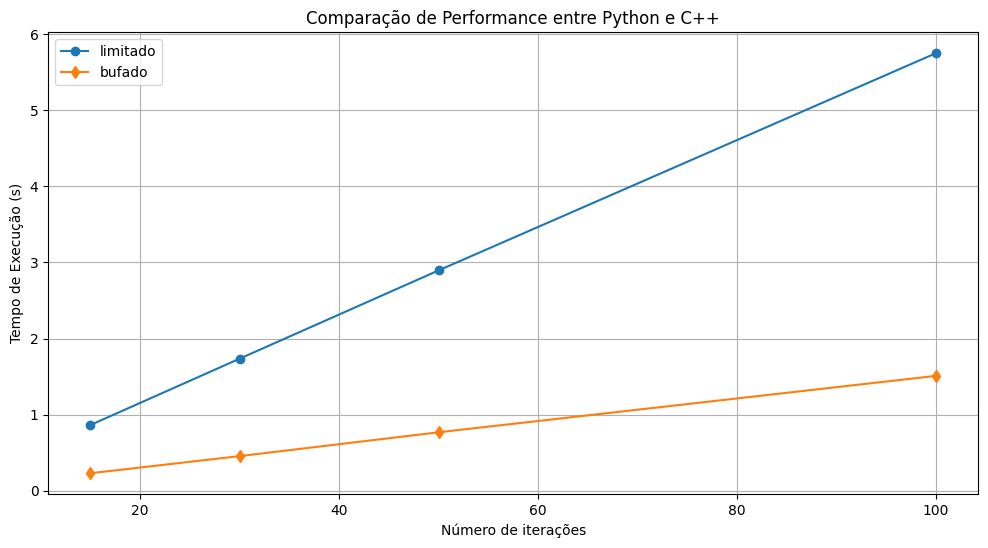

In [6]:
import matplotlib.pyplot as plt

# numero de iteracoes
iteracoes = [15, 30, 50, 100]

# Performance values
convolucao_limitado_performance = [convolucao_limitado_15, convolucao_limitado_30, convolucao_limitado_50, convolucao_limitado_100]
convolucao_buffado_performance = [convolucao_buffado_15, convolucao_buffado_30, convolucao_buffado_50, convolucao_buffado_100]

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(iteracoes, convolucao_limitado_performance, label='limitado', marker='o')
plt.plot(iteracoes, convolucao_buffado_performance, label='bufado', marker='d')

plt.xlabel('Número de iterações')
plt.ylabel('Tempo de Execução (s)')
plt.title('Comparação de Performance entre Python e C++')
plt.legend()
plt.grid(True)

plt.show()

Pode-se observar que aumentando o SBATCH da maquina como memoria e processos, o tempo de execução do código diminui, pois o código é executado em paralelo, e com mais processos e memoria, o código é executado mais rapidamente. Pode-se observar pelo gráfico limitado aumenta o tempo de execução mais rapidamente comparado com o bufado, analizando o gradiente de ambos.

##### 2 - Modificando as configurações dos arquivos SLURM para comparar o impacto com os resultados base

Para comparar diferentes hardwares para analizar como isso impacta no tempo de execução do código, iremos deixar o número de iterações constante em 150, tendo um programa base com 1 cpu por task e 512MB de RAM, e um programa onde iremos modificar o hardware para a análise.

In [7]:
########### 1 cpu-per-task, 1 ntask e 512MB RAM ###########
config_cpu_1_150 = 8.60243
print("configuração 1: ", config_cpu_1_150)

########### 2 cpu-per-task, 2 ntask e 512MB RAM ###########
config_cpu_2_150 = 5.89956
print("configuração 2: ", config_cpu_2_150)

########### 3 cpu-per-task, 3 ntask e 512MB RAM ###########
config_cpu_3_150 = 4.0935
print("configuração 3: ", config_cpu_3_150)

########### 4 cpu-per-task, 4ntask e 512MB RAM ###########
config_cpu_4_150 = 2.274
print("configuração 4: ", config_cpu_4_150)


configuração 1:  8.60243
configuração 2:  5.89956
configuração 3:  4.0935
configuração 4:  2.274


In [8]:
########### 2 cpu-per-task, 2 ntask e 512MB RAM ###########
config_ram_1_150 = 4.24517
print("configuração 1: ", config_ram_1_150)

########### 2 cpu-per-task, 2 ntask e 1024 RAM ###########
config_ram_2_150 = 4.25439
print("configuração 2: ", config_ram_2_150)

########### 2 cpu-per-task, 2 ntask e 2048 RAM ###########
config_ram_3_150 = 4.26709
print("configuração 3: ", config_ram_3_150)

########### 2 cpu-per-task, 2 ntask e 4096 RAM ###########
config_ram_4_150 = 4.25247
print("configuração 4: ", config_ram_4_150)

configuração 1:  4.24517
configuração 2:  4.25439
configuração 3:  4.26709
configuração 4:  4.25247


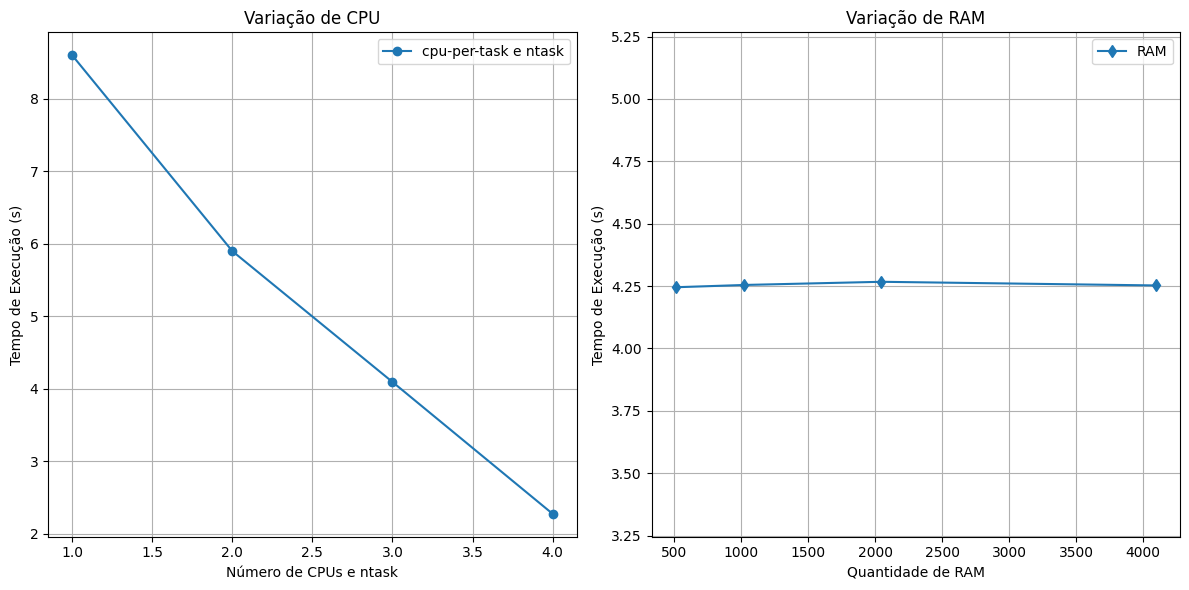

In [24]:
# plot do grafico variando cpu-per-task e ntask
plt.figure(figsize=(12, 6))

config_cpu_performance = [config_cpu_1_150, config_cpu_2_150, config_cpu_3_150, config_cpu_4_150]
config_ram_performance = [config_ram_1_150, config_ram_2_150, config_ram_3_150, config_ram_4_150]

# CPU variation
plt.subplot(1, 2, 1)
plt.plot([1, 2, 3, 4], config_cpu_performance, label='cpu-per-task e ntask', marker='o')
plt.xlabel('Número de CPUs e ntask')
plt.ylabel('Tempo de Execução (s)')
plt.title('Variação de CPU')
plt.grid()
plt.legend()

# RAM variation
plt.subplot(1, 2, 2)
plt.plot([512, 1024, 2048, 4096], config_ram_performance, label='RAM', marker='d')
plt.xlabel('Quantidade de RAM')
plt.ylabel('Tempo de Execução (s)')
plt.title('Variação de RAM')
plt.grid()
plt.legend()

plt.ylim(min(config_ram_performance) - 1, max(config_ram_performance) + 1)  # Increase the y-axis limit to show a larger range of execution time

plt.tight_layout()
plt.show()

Com base nos gráficos, é nítido que variando a quantidade de CPU, podemos ver uma queda significante no tempo de execução do código, pois com mais processadores, mais processos em paralelo ele pode fazer, aumentando a velocidade de execução do codigo. Já na variação de memória, podemos ver que o tempo de execução do código não é tão impactado, pois o código não necessita de muita memória para ser executado, e com isso, a variação de memória não impacta tanto no tempo de execução do código. Para ver impacto com memória, seria necessário um código que necessitasse de muita memória para ser executado, aumentando a matriz por exemplo.

##### Explorando os comandos do SLURM

# Comandos SLURM: sinfo, squeue, sprio, srun, sstat, e strigger

SLURM é um gerenciador de filas de jobs amplamente utilizado em clusters de computação. Abaixo, estão listados alguns dos comandos mais utilizados para monitorar e gerenciar jobs no cluster, com uma breve explicação de suas diferenças e usabilidades.

### `sinfo`

- **Descrição**: O comando `sinfo` é utilizado para exibir informações sobre o estado dos nós e das partições no cluster.
- **Usabilidade**: Ideal para verificar rapidamente quais nós estão disponíveis, ocupados, ou inativos, além de obter detalhes das partições (filas).

#### Exemplo:
```bash
sinfo
```

### `squeue`

- **Descrição**: O comando `squeue` lista os jobs que estão atualmente na fila, incluindo os que estão aguardando, em execução, ou que já foram completados.
- **Usabilidade**: Útil para monitorar o status dos jobs na fila e verificar tempos de espera e execução.

#### Exemplo:
```bash
squeue
```

### `sprio`

- **Descrição**: O comando `sprio` mostra a prioridade dos jobs na fila, que é utilizada pelo SLURM para determinar a ordem de execução dos jobs.
- **Usabilidade**: Essencial para entender como os jobs são priorizados no cluster e ajustar prioridades se necessário.

#### Exemplo:
```bash
sprio
```

### `srun`

- **Descrição**: O comando `srun` é utilizado para iniciar um job em tempo real, alocando recursos e executando o comando especificado no nó computacional.
- **Usabilidade**: Ideal para a execução direta de programas ou scripts em nós de computação, especialmente em modo interativo.

#### Exemplo:
```bash
srun -n 4 my_program
```

### `sstat`

- **Descrição**: O comando `sstat` monitora o uso de recursos (como CPU e memória) de jobs que já estão em execução.
- **Usabilidade**: Importante para acompanhar o desempenho de jobs em execução e diagnosticar possíveis gargalos de recursos.

#### Exemplo:
```bash
sstat --jobs=job_id
```

### `strigger`

- **Descrição**: O comando `strigger` permite definir, listar e remover triggers (gatilhos) que disparam ações baseadas em certos eventos, como mudanças no estado de um job.
- **Usabilidade**: Útil para automatizar ações em resposta a eventos específicos, como a conclusão de um job.

#### Exemplo:
```bash
strigger --set --jobid=job_id --state=COMPLETED --program=/path/to/script.sh
```

Esses comandos são essenciais para a gestão eficaz de jobs em um ambiente de computação de alto desempenho, permitindo um controle detalhado sobre a execução e monitoramento de recursos no cluster.
